<a href="https://colab.research.google.com/github/rylan-berry/DeepLearningIndependentStudy/blob/main/Chapter7_Regularization_FullLab_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 Deep Learning Problem Set — Chapter 7: Regularization for Deep Learning

Welcome! This lab is based on **Chapter 7 of *Deep Learning* (Goodfellow et al.)**

In this lab, you’ll explore concepts like **overfitting**, **regularization**, **dropout**, and **data augmentation** — all key to building generalizable deep neural networks.



## 🧩 Section 1 — Warm-Up: Review & Concept Questions

Answer the following questions by typing your choice (A, B, or C) in the Python cell below.



### 🔍 **Q1. What is overfitting?**
A) The model learns the general trend  
**B) The model memorizes training data but fails on test data**

C) The model performs equally on both sets  

---

### 🔍 **Q2. Which of the following helps prevent overfitting?**
A) Using a smaller dataset  
**B) Adding regularization**

C) Training longer  

---

### 🔍 **Q3. Which of the following best describes dropout?**
**A) Randomly removing neurons during training**

B) A technique for speeding up convergence  
C) Normalizing the data before training  



## ⚙️ Section 2 — L2 Regularization

Regularization helps reduce overfitting by discouraging large weights.

### Task:
1. Train a simple neural network on a small dataset (like MNIST with 1000 samples).  
2. Add **L2 regularization** (`kernel_regularizer=keras.regularizers.l2(0.001)`) to each dense layer.  
3. Compare training and validation accuracy before and after adding L2.


*NOTE: ChatGPT failed me here, it made the entire thing for me when it was meant to leave space for me to program. I'm going to run with this and simply make comments on the model comparison. I wish it hadn't used a prexisting library to add the regularization, when I would've prefered something where I make it from scratch.*

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3959 - loss: 1.9808 - val_accuracy: 0.7557 - val_loss: 0.9695
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8367 - loss: 0.6932 - val_accuracy: 0.8280 - val_loss: 0.5734
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8815 - loss: 0.3960 - val_accuracy: 0.8510 - val_loss: 0.4787
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9387 - loss: 0.2483 - val_accuracy: 0.8734 - val_loss: 0.4132
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9650 - loss: 0.1836 - val_accuracy: 0.8789 - val_loss: 0.4078
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9727 - loss: 0.1394 - val_accuracy: 0.8764 - val_loss: 0.4059
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9770 - loss: 0.1100 - val_accuracy: 0.8823 - val_loss: 0.3845
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9945 - loss: 0.0710 - val_accuracy: 0.8797 - v

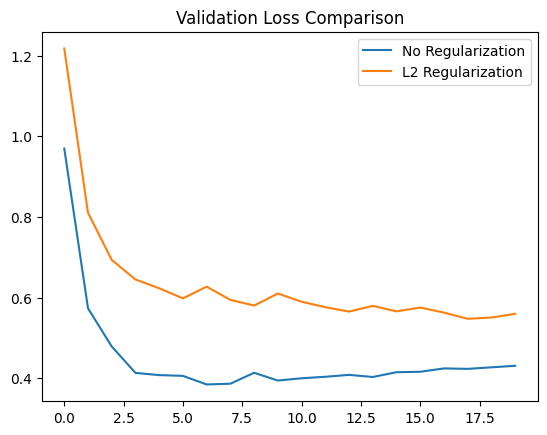

In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, y_train = x_train[:1000], y_train[:1000]
x_train = x_train.reshape(1000, -1) / 255.0
x_test = x_test.reshape(len(x_test), -1) / 255.0

# Model without regularization
model_no_reg = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_no_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_reg = model_no_reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

# Model with L2 regularization
model_l2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

# Plot (I changed to plot loss instead of accuracy)
plt.plot(history_no_reg.history['val_loss'], label='No Regularization')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


*Interestingly, across all of these using an epoch of 20, with regularization prefomed worse than without.*

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3818 - loss: 1.9604 - val_accuracy: 0.7312 - val_loss: 0.9803
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8225 - loss: 0.7270 - val_accuracy: 0.8306 - val_loss: 0.5647
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8887 - loss: 0.3804 - val_accuracy: 0.8474 - val_loss: 0.4893
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9227 - loss: 0.2864 - val_accuracy: 0.8617 - val_loss: 0.4368
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9564 - loss: 0.2031 - val_accuracy: 0.8728 - val_loss: 0.4050
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9734 - loss: 0.1517 - val_accuracy: 0.8712 - val_loss: 0.4157
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9776 - loss: 0.1154 - val_accuracy: 0.8731 - val_loss: 0.4063
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9754 - loss: 0.0981 - val_accuracy: 0.8706 - val_loss: 0.

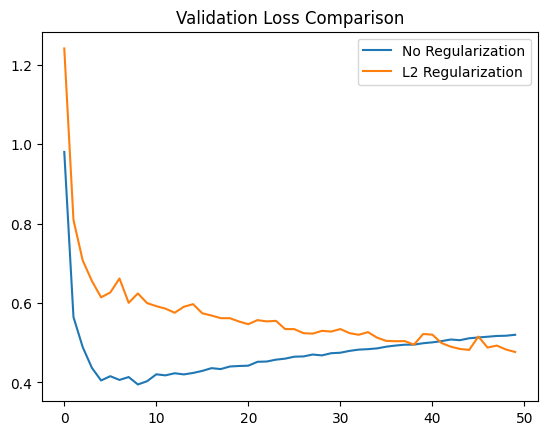

In [ ]:
#Copy of prev code but making changes

#Hyperparameters
epochs = 50

# Model without regularization
model_no_reg = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_no_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_reg = model_no_reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1)

# Model with L2 regularization
model_l2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1)

# Plot
plt.plot(history_no_reg.history['val_loss'], label='No Regularization')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


*Ah, these models show a different picture than before. The L2 model takes longer to converge, but, it's avoided overfitting, which is seen in the model without regularization.*

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4221 - loss: 1.8843 - val_accuracy: 0.7840 - val_loss: 0.8580
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8395 - loss: 0.6544 - val_accuracy: 0.8446 - val_loss: 0.5369
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9071 - loss: 0.3569 - val_accuracy: 0.8703 - val_loss: 0.4439
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9518 - loss: 0.2227 - val_accuracy: 0.8655 - val_loss: 0.4452
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9572 - loss: 0.1868 - val_accuracy: 0.8801 - val_loss: 0.4007
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9782 - loss: 0.1225 - val_accuracy: 0.8729 - val_loss: 0.4163
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9858 - loss: 0.0934 - val_accuracy: 0.8777 - val_loss: 0.4073
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9940 - loss: 0.0641 - val_accuracy: 0.

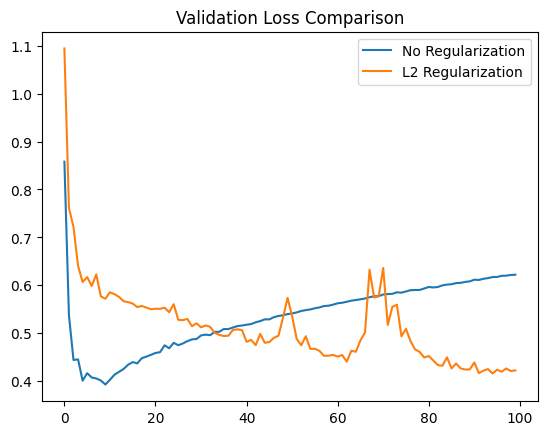

In [ ]:
#Copy of prev code but making changes

#Hyperparameters
epochs = 100

# Model without regularization
model_no_reg = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_no_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_reg = model_no_reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1)

# Model with L2 regularization
model_l2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_l2 = model_l2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1)

# Plot
plt.plot(history_no_reg.history['val_loss'], label='No Regularization')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


*This model is showing that in the long run the regularizing model continues to reduce the validation loss (with a few spikes that I can't explain, maybe it was going up a hill then found a higher one).*


## 🧠 Section 3 — Dropout Regularization

Dropout randomly turns off neurons during training to prevent over-reliance on specific neurons.

### Task:
1. Add **Dropout layers** between dense layers (e.g., `rate=0.5`).  
2. Compare the results with and without dropout.  
3. Discuss the impact on training and validation accuracy.


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1401 - loss: 2.2743 - val_accuracy: 0.6088 - val_loss: 1.8133
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3909 - loss: 1.8242 - val_accuracy: 0.7338 - val_loss: 1.2147
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5473 - loss: 1.4326 - val_accuracy: 0.7765 - val_loss: 0.9145
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6530 - loss: 1.1411 - val_accuracy: 0.8050 - val_loss: 0.7181
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7078 - loss: 0.9800 - val_accuracy: 0.8174 - val_loss: 0.6311
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7208 - loss: 0.8818 - val_accuracy: 0.8263 - val_loss: 0.5782
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7910 - loss: 0.7592 - val_accuracy: 0.8463 - val_loss: 0.5377
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7974 - loss: 0.6378 - val_accuracy: 0.8500 - val_l

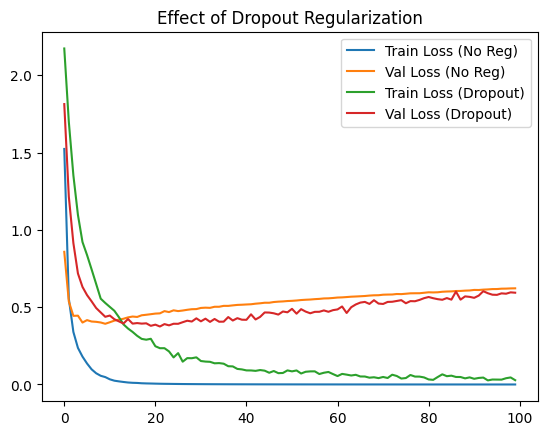

In [ ]:

# Model with dropout
model_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Changed from 20 to 100 epochs
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

plt.plot(history_no_reg.history['loss'], label='Train Loss (No Reg)')
plt.plot(history_no_reg.history['val_loss'], label='Val Loss (No Reg)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Val Loss (Dropout)')
plt.legend()
plt.title("Effect of Dropout Regularization")
plt.show()


*Dropout isn't effective here, it still takes longer to converge and the validation is just barely below that of the no regularization model.*

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2395 - loss: 2.1603 - val_accuracy: 0.7189 - val_loss: 1.3876
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5778 - loss: 1.3857 - val_accuracy: 0.7796 - val_loss: 0.8314
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7383 - loss: 0.9527 - val_accuracy: 0.8222 - val_loss: 0.6241
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7910 - loss: 0.7101 - val_accuracy: 0.8474 - val_loss: 0.5290
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8570 - loss: 0.5198 - val_accuracy: 0.8612 - val_loss: 0.4706
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8874 - loss: 0.3798 - val_accuracy: 0.8698 - val_loss: 0.4408
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8910 - loss: 0.4029 - val_accuracy: 0.8739 - val_loss: 0.4302
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8942 - loss: 0.3245 - val_accuracy: 0.

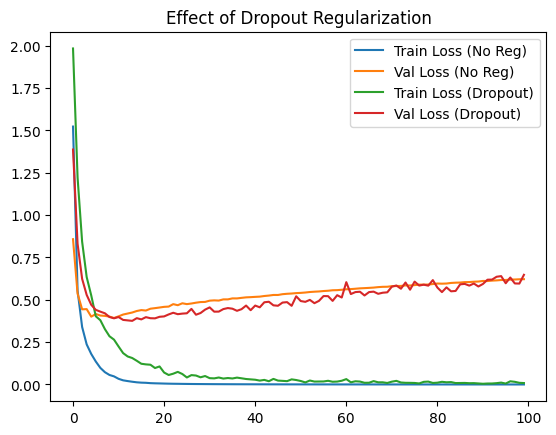

In [ ]:

# Model with dropout (lowered rate)
model_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Changed from 20 to 100 epochs
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

plt.plot(history_no_reg.history['loss'], label='Train Loss (No Reg)')
plt.plot(history_no_reg.history['val_loss'], label='Val Loss (No Reg)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Val Loss (Dropout)')
plt.legend()
plt.title("Effect of Dropout Regularization")
plt.show()


*Decreasing the rate has seemingly made the model preform worse, but it converges faster than the higher rate model.*

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.1097 - loss: 2.7507 - val_accuracy: 0.2547 - val_loss: 2.2460
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1252 - loss: 2.3157 - val_accuracy: 0.3766 - val_loss: 2.2235
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1422 - loss: 2.2459 - val_accuracy: 0.4185 - val_loss: 2.1792
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1501 - loss: 2.2753 - val_accuracy: 0.4585 - val_loss: 2.1596
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1877 - loss: 2.1903 - val_accuracy: 0.5112 - val_loss: 2.0810
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1936 - loss: 2.1516 - val_accuracy: 0.5503 - val_loss: 1.9858
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2086 - loss: 2.1288 - val_accuracy: 0.5678 - val_loss: 1.9169
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2442 - loss: 2.0850 - val_accuracy: 0.

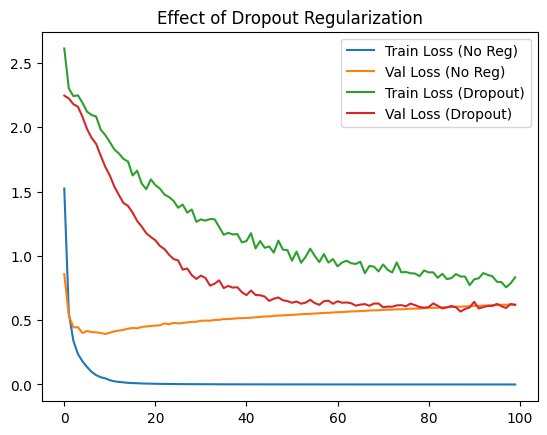

In [ ]:

# Model with dropout (increased rate)
model_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(rate=0.8),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.8),
    keras.layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Changed from 20 to 100 epochs
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1)

plt.plot(history_no_reg.history['loss'], label='Train Loss (No Reg)')
plt.plot(history_no_reg.history['val_loss'], label='Val Loss (No Reg)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Val Loss (Dropout)')
plt.legend()
plt.title("Effect of Dropout Regularization")
plt.show()


*This increased rate barely even converges, nodes are being removed too frequently, the model is underfitting.*

*Based on these models, dropout is finicky. It's not as guarenteed to improve the model as the L2 normalization. Dropout also needs to be finetuned, too low and it won't have an important impact, and may still overfit, but too high, and you may face underfitting.*


## 🎨 Section 4 — Data Augmentation & Noise Injection

Adding small changes (noise, rotation, shifting) can help models generalize.

### Task:
1. Apply simple image augmentations (rotation, zoom, noise).  
2. Retrain your model using the augmented dataset.  
3. Observe any differences in performance.


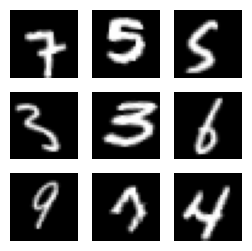

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train.reshape(-1, 28, 28, 1))

# Example visualization
import numpy as np
import matplotlib.pyplot as plt

for x_batch, y_batch in datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=9):
    plt.figure(figsize=(3,3))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i].reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    break


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2024 - loss: 2.1932 - val_accuracy: 0.5363 - val_loss: 1.5051
Epoch 2/100
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3750 - loss: 1.9782

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3750 - loss: 1.9782 - val_accuracy: 0.5463 - val_loss: 1.4873
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4847 - loss: 1.6286 - val_accuracy: 0.7125 - val_loss: 1.0196
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6875 - loss: 1.0607 - val_accuracy: 0.7083 - val_loss: 1.0194
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5694 - loss: 1.3035 - val_accuracy: 0.7649 - val_loss: 0.8041
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7188 - loss: 0.9836 - val_accuracy: 0.7636 - val_loss: 0.8003
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6438 - loss: 1.1302 - val_accuracy: 0.7787 - val_loss: 0.7062
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6562 - loss: 0.8938 - val_accuracy: 0.7806 - val_loss: 0.7022
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7037 - loss: 1.0027 - val_accuracy: 0.8065 - val_l

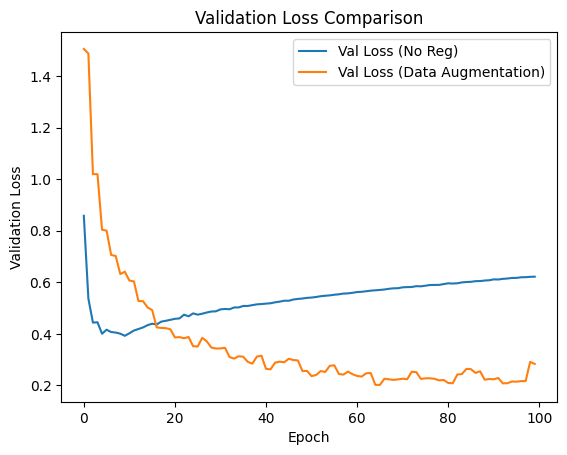

In [ ]:
epochs = 100
batch_size = 32

# Model with data augmentation (architecture remains the same as no_reg for comparison)
model_data_aug = keras.Sequential([
    keras.Input(shape=(28, 28, 1)), # Explicit Input layer expecting 28x28x1 images
    keras.layers.Flatten(),        # Flatten the 28x28x1 images into a 784-element vector
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_data_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
history_data_aug = model_data_aug.fit(
    datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_test.reshape(-1, 28, 28, 1), y_test), # Reshape x_test for validation
    epochs=epochs,
    verbose=1
)

# Plot
plt.plot(history_no_reg.history['val_loss'], label='Val Loss (No Reg)')
plt.plot(history_data_aug.history['val_loss'], label='Val Loss (Data Augmentation)')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

*The Augmented Data Model preformed much better.*